# Study on the Cardiovascular Disease dataset, Visualisation using Seaborn data visualization library and prediction using PyCaret Machine learning library





## Dataset description
Name:              Cardiovascular Disease dataset

Small Description: The dataset consists of 70 000 records of patients data, 11 features + target.

Author:            Svetlana Ulianova

Usability:         6.5

Data Description:  There are 3 types of input features:
                   Objective: factual information;
                   Examination: results of medical examination;
                   Subjective: information given by the patient.

Features:          
                   1. Age | Objective Feature | age | int (days)
                   2. Height | Objective Feature | height | int (cm) |
                   3. Weight | Objective Feature | weight | float (kg) |
                   4. Gender | Objective Feature | gender | categorical code |
                   5. Systolic blood pressure | Examination Feature | ap_hi | int |
                   6. Diastolic blood pressure | Examination Feature | ap_lo | int |
                   7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
                   8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
                   9. Smoking | Subjective Feature | smoke | binary |
                   11. Alcohol intake | Subjective Feature | alco | binary |
                   12. Physical activity | Subjective Feature | active | binary |
                   13. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

Dataset link:      https://www.kaggle.com/sulianova/cardiovascular-disease-dataset
                  
#### All of the dataset values were collected at the moment of medical examination.


## Step -1 (loading the libraries and dataset )
First we have to import the libraries for data analysis(i.e: numpy and pandas) and load the dataset   

In [ ]:
#importing data analysis libraries
import pandas as pd
import numpy as np

#loading the path of the function to the dataset
path = '/cardio_train.csv'

#loading the dataset and seting the index to id
#please note that the csv file is ';' separated and not ',' separated
cardio_data = pd.read_csv(path, sep = ';')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#checking out the data(run the cell)
cardio_data.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [ ]:
#check for null values(run the cell)
print(cardio_data.shape)
cardio_data.describe()

(70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Step-2 (changing the age to years)

The dataset does'nt contain any null values but the age coloumn is in days and that is not the conventional way to represent someone's age so the next step is to change the age to years and rounding it to one decimal places

In [ ]:
#never run this cell more than one time then it will give error
#writing the function to change age
def changeage(row):
    row.age = round(row.age/365, 1)
    return row

#applying the function to every row of the dataset
cardio_data = cardio_data.apply(changeage, axis = 1)

In [ ]:
#checking out the data again
cardio_data.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0.0,50.4,2.0,168.0,62.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,55.4,1.0,156.0,85.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,1.0
2,2.0,51.7,1.0,165.0,64.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,1.0
3,3.0,48.3,2.0,169.0,82.0,150.0,100.0,1.0,1.0,0.0,0.0,1.0,1.0
4,4.0,47.9,1.0,156.0,56.0,100.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0
5,8.0,60.0,1.0,151.0,67.0,120.0,80.0,2.0,2.0,0.0,0.0,0.0,0.0
6,9.0,60.6,1.0,157.0,93.0,130.0,80.0,3.0,1.0,0.0,0.0,1.0,0.0
7,12.0,61.9,2.0,178.0,95.0,130.0,90.0,3.0,3.0,0.0,0.0,1.0,1.0
8,13.0,48.4,1.0,158.0,71.0,110.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0
9,14.0,54.3,1.0,164.0,68.0,110.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
#checking the minimun and maximum value in the age column

cardio_data.age.describe()

count    70000.000000
mean        53.339486
std          6.759534
min         29.600000
25%         48.400000
50%         54.000000
75%         58.400000
max         65.000000
Name: age, dtype: float64

We can see that the person with the minimum age in the dataset is 29.6 years old so there is no need to classify the ages into to sub-catagories(i.e: minor, major). Now the next step isto visualize the data and checkout the co-relation between different features.

## Step-3 (Creating two new column for ap_hi and ap_lo)

The column 'ap_hi' and 'ap_lo' consists many irrelevant values. To tackle those we can create a new feature high_bp where if the systolic pressure is higher than medical prescribed value 140 or the diastolic pressure is higher than medical prescribed value 90 then we consider it as high blood pressure which is relevent while studying cardiovascular diseases. So in the coloumn hi_bp we will put 1 if the person has high blood pressure else we will put 0.

In [ ]:
#creating a new column:
def createHighBp(row):
    if row.ap_hi >= 140 or row.ap_lo >= 90:
        row['high_bp'] = 1
        return row
    else:
        row['high_bp'] = 0
        return row

#applying the function
cardio_data = cardio_data.apply(createHighBp, axis = 1)


In [ ]:
#checking the data set again
cardio_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,high_bp
0,0.0,50.4,2.0,168.0,62.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,55.4,1.0,156.0,85.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,1.0,1.0
2,2.0,51.7,1.0,165.0,64.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0
3,3.0,48.3,2.0,169.0,82.0,150.0,100.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
4,4.0,47.9,1.0,156.0,56.0,100.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


## Step-4 (importing data visualization libraries)
Now we have to visualize the data to see the co-relation between different features and try to figure out how they are related.
For data visualization I will use seaborn and matplotlib library

In [ ]:
#importing matplotlib and seaborn

import matplotlib.pyplot as plt
import seaborn as sns

## Age v/s Cardiovascular disease analysis
###### The X-axis represents the people having anykind of cardiocasular disease.
Those who have anykind of cardiovascular disease are represented by 1.0 and those who don't have anykind kind of cardiovascular disease are represented by 0.0
###### The Y-axis represents age of people examined.
The initial data set had the ages in days but in step-2 we change the age to years and y axis represents that



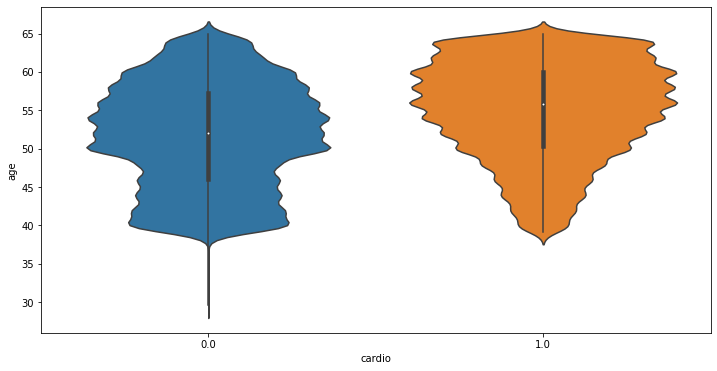

In [ ]:
#plotting violin plot to visualize the distribution
plt.figure(figsize = (12,6))
sns.violinplot(x = cardio_data.cardio, y = cardio_data.age)

### Analysis:
1. As we can see in the people with cardiovascular diseases (i.e: Orange distribution) distribution the distribution triangle is upside down and that implies that number of sample with cardiovascular diseases increase with increase in age so it varies linearly

2. In the people without cardiovascular diseases (i.e: Blue Distribution) there are no definite geometrical shape but we can consider it as a combination of two triangles whose vertex is facing upwards. Which implies that with increase in age the number of people without cardiovascular diseases decreases.

3. The reason for the uncertainity in the shape of the distribution without cardiovascular diseases maybe because of the sudden increase of samples in the dataset.

4. Both the distribution implies the same thing and that is people with higher age are more tend to have cardiovascular diseases than people with lower age.

To know more about reading the violin plot refer to this link: https://seaborn.pydata.org/generated/seaborn.violinplot.html

## Gender vs Cardiovascular disease analysis
#### The X-axis represents gender of the sample where 1 represents women and 2 represents men
#### The Y-axis represents cardiovascular diseases where 1 represents it is presents and 0 represents it is not present


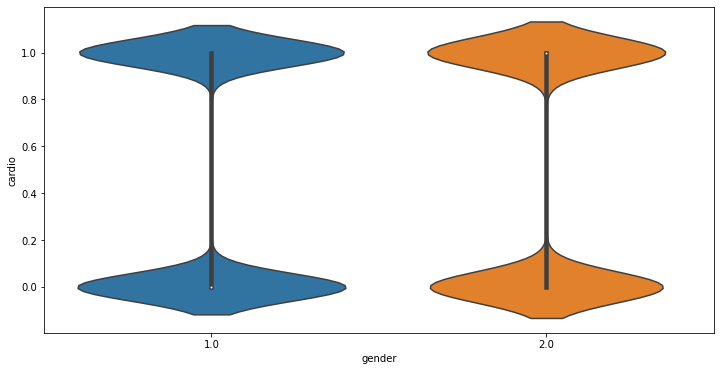

In [ ]:
#plotting violin plot to visualize the distribution
plt.figure(figsize=(12,6))
sns.violinplot(x = cardio_data.gender, y = cardio_data.cardio)

### Analysis
For both female(i.e: blue distribution) and male(i.e: orange distribution) the width of the the violin plot is more or less same which implies that cardiovascular diseases are gender independent. Though something to notice is that for female samples the median is at 0 (absence cardiovascular disease) and for male samples the median is at 1(Presence of cardiovascular disease ). Even if there is any co-relation with gender and cardiovascular disease we cannot include it to train our machine learning model.

## Height vs Cardiovascular diseases analysis
#### The X-axis represents the presence (i.e: 1.0) or absence (i.e: 0.0) of cardiovascular diseases.

#### The Y-axis represents the Height of each sample (in centimeters).


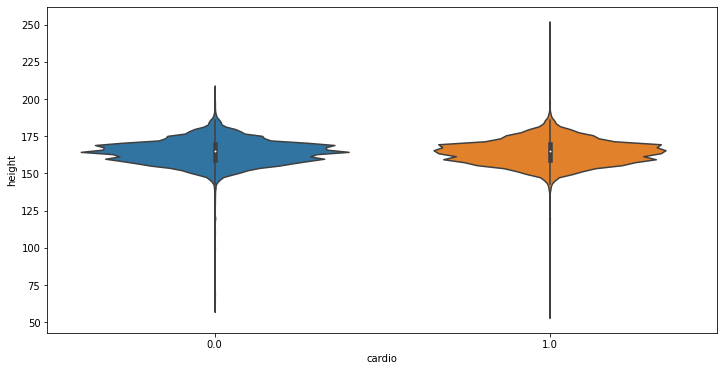

In [ ]:
#plotting violin plot to visualize the distribution
plt.figure(figsize = (12,6))
sns.violinplot(x = cardio_data.cardio, y = cardio_data.height)

## Analysis

Just like gender here also the distribution of cardiovascular disease is independent of sample's height. In both the distribution(i.e: presence and absence of Cardiovascular disease) the median value of height is same and the shape of the distribution curve is also similar. So, we cannot use height as a feature to train our machine learning model.

## Weight vs Cardiovascular diseases analysis
##### The X-axis represents the presence (i.e: 1.0) or absence (i.e: 0.0) of cardiovascular diseases.

##### The Y-axis represents the weight of each sample (in kilograms).



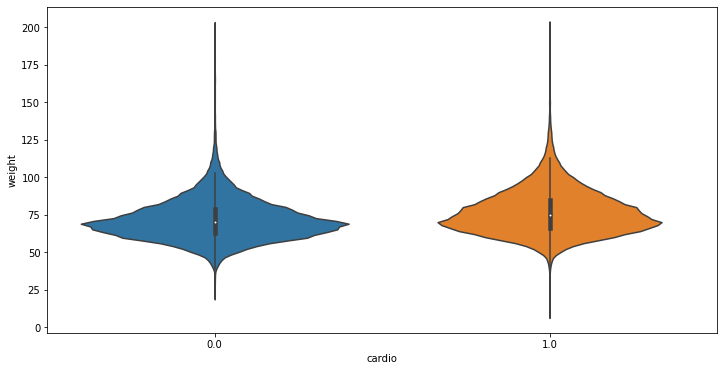

In [ ]:
#plotting violin plot to visualize the distribution
plt.figure(figsize =(12,6))
sns.violinplot(x = cardio_data.cardio , y = cardio_data.weight)

## Analysis

Just like height here also the distribution of cardiovascular disease is independent of sample's weight. In both the distribution(i.e: presence and absence of Cardiovascular disease) the median value of weight is same and the shape of the distribution curve is also similar. So, we cannot use weight as a feature to train our machine learning model.

## Hi_bp vs Cardiovascular diseases
#### The X-axis represents hi_bp (i.e: 1 if the sample has high blood pressure, else 1) 
#### The Y-axis represents if a person has cardiovascular diseases or not

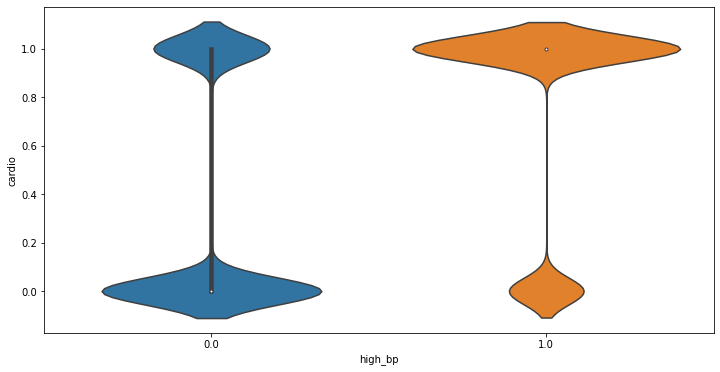

In [ ]:
#plotting violin plot to visualize the distribution
plt.figure(figsize =(12,6))
sns.violinplot(x = cardio_data.high_bp , y = cardio_data.cardio)

### Analysis

The graph shows that those who have high blood pressure are more tend to have cardiovascular diseases and who have low blood pressure have a low tendency to have cardiovascular diseases.

## Cholesterol vs Cardiovascular diseases

#### The X-axis represents cholesterol (i.e: 1 if the sample normal has cholesterol level, 3 if the sample has way above average cholesterol) 
#### The Y-axis represents if a person has cardiovascular diseases or not

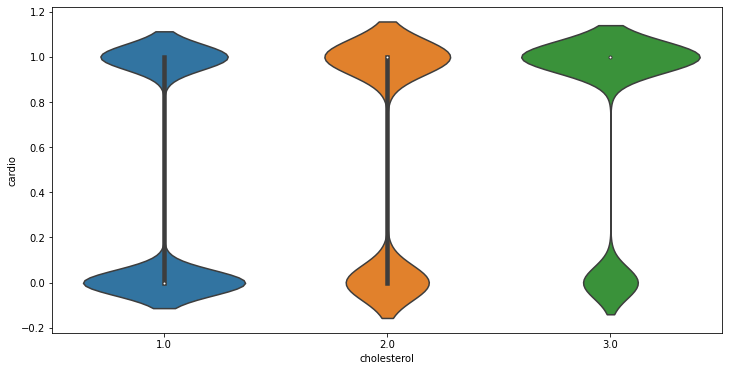

In [ ]:
#plotting violin plot to visualize the distribution
plt.figure(figsize =(12,6))
sns.violinplot(x = cardio_data.cholesterol , y = cardio_data.cardio)

### Analysis 
As we can see from the image, samples with 3rd level cholesterol has a higher tendency to have cardiovascular diseases

## Blood Glucose Level vs Cardiovascular diseases

##### The X-axis represents glucose level (i.e: 1 if the sample has normal glucose level, 3 if the sample has way above average glucose level) 
##### The Y-axis represents if a person has cardiovascular diseases or not

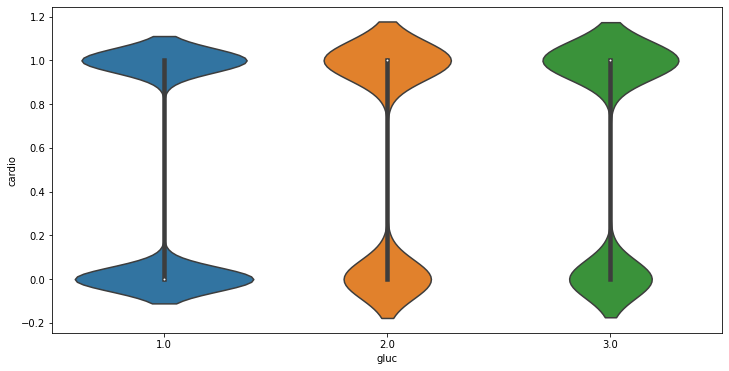

In [ ]:
#plotting violin plot to visualize the distribution
plt.figure(figsize =(12,6))
sns.violinplot(x = cardio_data.gluc , y = cardio_data.cardio)

### Analysis 
As we can see from the image, samples with 3rd level glucose has a slightly higher tendency to have cardiovascular diseases than people with level 2 or level 3 blood glucose level

## Smoke, alcohol, active vs Cardiovascular diseases

##### The Y-axis represents smoke, alcohol, active  level (i.e: 1 for positive, 0 for negative) 
##### The X-axis represents if a person has cardiovascular diseases or not

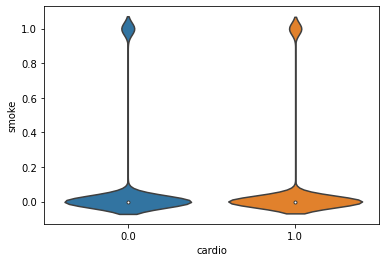

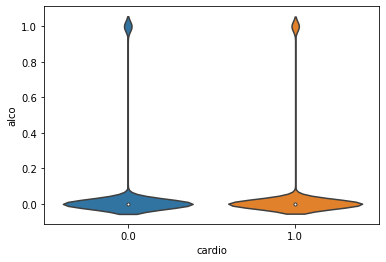

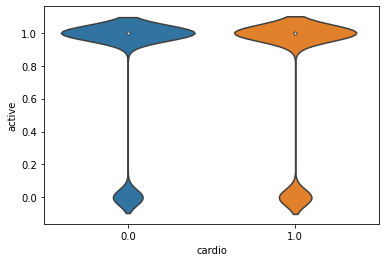

In [ ]:
#plotting violin plot of smoke vs cardiovascular diseases

sns.violinplot(x = cardio_data.cardio , y = cardio_data.smoke)
plt.show()

#plotting violin plot of alcohol vs cardiovascular diseases

sns.violinplot(x = cardio_data.cardio , y = cardio_data.alco)
plt.show()

#plotting violin plot of physical activity vs cardiovascular diseases

sns.violinplot(x = cardio_data.cardio , y = cardio_data.active)
plt.show()




### Analysis

For the above the figure in all the cases the diagram for people having cardiovascular diseases and people not having cardiovascular diseases are the same. So even if they are important feature to predict cardiovascular diseases in real life, we can not use these three features to train our machine learninf model

# Building Machine learning model

#### Usually Machine learning model building is a pretty code-heavy and regorous process. Before starting this project i decided to stick with KNN for my machine learning model but yesterday i came across the pycaret library for machine learning at it looked pretty promising so i decided to ditch the idea of using KNN and insted i chose pycaret library 

In [ ]:
#installing pycaret library
#uncomment the below code to install pycaret
#!pip install pycaret

In [ ]:
#check pycaret version
from pycaret.utils import version
version()

2.0


In [169]:
data = pd.read_csv('/cardio_train.csv',sep = ';')

In [170]:
data.drop('id', axis = 1, inplace = True)

### Comparing baseline models

In [173]:
#model without 'high_bp' column
from pycaret.classification import *
clf1 = setup(data, target = 'cardio', session_id=123, log_experiment=True, experiment_name='cardio1')
 

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(70000, 12)"
4,Missing Values,False
5,Numeric Features,5
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [174]:
## Finding the best model with 70% data from dataset as test data
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Light Gradient Boosting Machine,0.7375,0.8006,0.7022,0.7554,0.7278,0.4751,0.4763,0.4025
1,Gradient Boosting Classifier,0.7366,0.8013,0.7047,0.7525,0.7278,0.4732,0.4742,3.9344
2,Extreme Gradient Boosting,0.7362,0.8015,0.7018,0.7533,0.7266,0.4723,0.4735,1.7710
3,CatBoost Classifier,0.7347,0.8000,0.7010,0.7514,0.7253,0.4693,0.4704,19.4775
4,Ada Boost Classifier,0.7284,0.7945,0.6581,0.7655,0.7077,0.4568,0.4614,1.2297
5,Logistic Regression,0.7012,0.7610,0.6694,0.7148,0.6913,0.4025,0.4034,0.6559
6,Extra Trees Classifier,0.7012,0.7588,0.6979,0.7023,0.7001,0.4024,0.4024,2.8953
7,Random Forest Classifier,0.6993,0.7522,0.6545,0.7186,0.6850,0.3985,0.4001,0.4145
8,K Neighbors Classifier,0.6817,0.7263,0.6614,0.6891,0.6749,0.3633,0.3637,0.2816
9,Ridge Classifier,0.6480,0.0000,0.6142,0.6585,0.6355,0.2960,0.2967,0.0288


#### While fitting the model I have chosen the training dataset to be 66% of the entire dataset and 34% for testing from the entire dataset.

##### we can see that 5 machine learning model are giving us 100% accuracy and they are: 'Decision Tree Classifier','Ada Boost Classifier','Gradient Boosting Classifier','Light Gradient Boosting Machine' and 'CatBoost Classifier'

###### *there is a probability of overfitting nut as we devided the dataset into train and test data so the probabiliy od overfitting is less

## Predict model


In [175]:
## chosing the model
## first let's check out the models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process.GPC,False
mlp,MLP Classifier,sklearn.neural_network.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model.RidgeClassifier,True


In [176]:
## creating the model
##checking out the best model
best = automl(optimize = 'Recall')
best

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [177]:
## So we can see that decision tree classifier is the best model
## creating decision tree classifier model
lightgbm  = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7350,0.7945,0.7054,0.7495,0.7268,0.4700,0.4708
1,0.7394,0.8064,0.6931,0.7635,0.7266,0.4787,0.4807
2,0.7324,0.7957,0.6995,0.7484,0.7232,0.4647,0.4657
3,0.7359,0.8026,0.7042,0.7516,0.7271,0.4717,0.4726
4,0.7397,0.8036,0.7054,0.7570,0.7303,0.4793,0.4804
5,0.7402,0.8045,0.6995,0.7613,0.7291,0.4804,0.4820
6,0.7440,0.8015,0.7153,0.7587,0.7363,0.4880,0.4888
7,0.7420,0.8073,0.7159,0.7551,0.7350,0.4839,0.4846
8,0.7324,0.7953,0.6867,0.7555,0.7194,0.4647,0.4666
9,0.7346,0.7947,0.6970,0.7533,0.7241,0.4692,0.4705


In [178]:
#predicting model
pred_cardio = predict_model(lightgbm)
pred_cardio.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7352,0.8018,0.7022,0.7517,0.7261,0.4705,0.4715


,age,height,weight,ap_hi,ap_lo,gender_1,gender_2,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1,cardio,Label,Score
0,14631.0,150.0,51.0,90.0,60.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0,0,0.0253
1,19437.0,161.0,71.0,120.0,80.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,0,0.4055
2,22039.0,146.0,79.0,193.0,118.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1,1,0.8243
3,20471.0,177.0,87.0,130.0,80.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0,0,0.4524
4,18902.0,170.0,65.0,120.0,80.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,0,0.2763


In [162]:
## For predicting new data input your file with all the coulumn same as the training data and run the below code
new_data = data.copy()

predict_new = predict_model(best, data=new_data)

predict_new.head()

## Conclusion

#### In this self-guided project I have used the Cardiovascular disease dataset to plot draphs and study important co-relation between different features of the dataset and the analysis of every graph are written under the plots.

#### The way the dataset was presented it had much flaws, like the 'ap_hi' and 'ap_lo' column had some irrelevant values. I decided not to drop the columns and insted created a new column named 'high_bp', if a sample has systolic pressure higher than 140 or diastolic pressure higher than 90 then I classified them as 'High' else 'Low'. and this single improvement helped in the visualisation process. I tried using 'high_bp' in my machine learning model but it was throwing error.
#### I will be uploading this notebook to my github and kagle repository so feel free to contribute and if possible then try using the 'high_bp' column.

#### The accuracy of the model is 74% but there is room for further improvements

### Thank you
### Avishek Chatterjee
### Jadavpur University
### Department of Mechanical Engineering 
### 03-08-2020
